In [49]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
print('hello')

hello


In [50]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import spacy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#import valid set
valid_set = pd.read_csv('C:/Users/marti/Documents/Martial/Machine Learning with Python Labs/projects/Project 2/Project 2/asap-aes/valid_set.tsv', delimiter='\t', encoding='latin1')

In [56]:
# import score of valid set
sample_score= pd.read_csv('C:/Users/marti/Documents/Martial/Machine Learning with Python Labs/projects/Project 2/Project 2/asap-aes/valid_sample_submission_5_column.csv')

In [57]:
# import training set
training_set= pd.read_excel('C:/Users/marti/Documents/Martial/Machine Learning with Python Labs/projects/Project 2/Project 2/asap-aes/training_set_rel3.xlsx')

In [58]:
training_set.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12978.000000,12978.000000,12977.000000,12977.000000,128.000000,12977.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.432809,4.179458,4.126840,4.137089,37.828125,6.799723,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6308.588616,2.136749,4.212537,4.264320,5.240829,8.970558,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4439.250000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10045.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15680.750000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [59]:
print(training_set)

       essay_id  essay_set                                              essay  \
0             1          1  Dear local newspaper, I think effects computer...   
1             2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4             5          1  Dear @LOCATION1, I know having computers has a...   
...         ...        ...                                                ...   
12973     21626          8   In most stories mothers and daughters are eit...   
12974     21628          8   I never understood the meaning laughter is th...   
12975     21629          8  When you laugh, is @CAPS5 out of habit, or is ...   
12976     21630          8                                 Trippin' on fen...   
12977     21633          8   Many people believe that laughter can improve...   

       rater1_domain1  rate

In [60]:
training_set.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
domain1_score         1
rater1_domain2    11178
rater2_domain2    11178
domain2_score     11178
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
dtype: int64

In [61]:
print(sample_score)

      prediction_id  essay_id  essay_set  essay_weight  predicted_score
0              1788      1788          1           1.0                7
1              1789      1789          1           1.0                8
2              1790      1790          1           1.0                9
3              1791      1791          1           1.0                9
4              1792      1792          1           1.0                9
...             ...       ...        ...           ...              ...
4813          24933     21933          8           1.0               33
4814          24934     21934          8           1.0               35
4815          24935     21935          8           1.0               38
4816          24937     21937          8           1.0               32
4817          24938     21938          8           1.0               39

[4818 rows x 5 columns]


In [62]:
print(valid_set)

      essay_id  essay_set                                              essay  \
0         1788          1  Dear @ORGANIZATION1, @CAPS1 more and more peop...   
1         1789          1  Dear @LOCATION1 Time @CAPS1 me tell you what I...   
2         1790          1  Dear Local newspaper, Have you been spending a...   
3         1791          1  Dear Readers, @CAPS1 you imagine how life woul...   
4         1792          1  Dear newspaper, I strongly believe that comput...   
...        ...        ...                                                ...   
4213     21933          8   Have you ever noticed that if two little kids...   
4214     21934          8                              Laughter @CAPS1 I ...   
4215     21935          8   Laughter in @CAPS1 A laugh is not just an act...   
4216     21937          8    LAUGHTER @CAPS1 i was younger my friend live...   
4217     21938          8   You know how the saying goes live, laugh, lov...   

      domain1_predictionid  domain2_pre

In [63]:
#valid set without domain2_predictionid
valid_set1=valid_set.iloc[:,:4]
print(valid_set1)

      essay_id  essay_set                                              essay  \
0         1788          1  Dear @ORGANIZATION1, @CAPS1 more and more peop...   
1         1789          1  Dear @LOCATION1 Time @CAPS1 me tell you what I...   
2         1790          1  Dear Local newspaper, Have you been spending a...   
3         1791          1  Dear Readers, @CAPS1 you imagine how life woul...   
4         1792          1  Dear newspaper, I strongly believe that comput...   
...        ...        ...                                                ...   
4213     21933          8   Have you ever noticed that if two little kids...   
4214     21934          8                              Laughter @CAPS1 I ...   
4215     21935          8   Laughter in @CAPS1 A laugh is not just an act...   
4216     21937          8    LAUGHTER @CAPS1 i was younger my friend live...   
4217     21938          8   You know how the saying goes live, laugh, lov...   

      domain1_predictionid  
0         

In [64]:
#valid set without domain1_predictionid
valid_set2=valid_set.iloc[:,[True,True,True,False,True]]
valid_set2

,essay_id,essay_set,essay,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,NaN
2,1790,1,"Dear Local newspaper, Have you been spending a...",NaN
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",NaN
4,1792,1,"Dear newspaper, I strongly believe that comput...",NaN
...,...,...,...,...
4213,21933,8,Have you ever noticed that if two little kids...,NaN
4214,21934,8,Laughter @CAPS1 I ...,NaN
4215,21935,8,Laughter in @CAPS1 A laugh is not just an act...,NaN
4216,21937,8,LAUGHTER @CAPS1 i was younger my friend live...,NaN


In [65]:
#training set of domain1
training_set1= training_set.drop(columns=['rater1_domain2','rater2_domain2','domain2_score'], axis=1)
print(training_set1)

       essay_id  essay_set                                              essay  \
0             1          1  Dear local newspaper, I think effects computer...   
1             2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4             5          1  Dear @LOCATION1, I know having computers has a...   
...         ...        ...                                                ...   
12973     21626          8   In most stories mothers and daughters are eit...   
12974     21628          8   I never understood the meaning laughter is th...   
12975     21629          8  When you laugh, is @CAPS5 out of habit, or is ...   
12976     21630          8                                 Trippin' on fen...   
12977     21633          8   Many people believe that laughter can improve...   

       rater1_domain1  rate

In [66]:
#training set of domain2
training_set2=training_set[['essay_id','essay_set','essay','rater1_domain2','rater2_domain2','domain2_score']]
print(training_set2)

       essay_id  essay_set                                              essay  \
0             1          1  Dear local newspaper, I think effects computer...   
1             2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4             5          1  Dear @LOCATION1, I know having computers has a...   
...         ...        ...                                                ...   
12973     21626          8   In most stories mothers and daughters are eit...   
12974     21628          8   I never understood the meaning laughter is th...   
12975     21629          8  When you laugh, is @CAPS5 out of habit, or is ...   
12976     21630          8                                 Trippin' on fen...   
12977     21633          8   Many people believe that laughter can improve...   

       rater1_domain2  rate

In [67]:
#training set of domain2 and cleaning datafram
training_set2=training_set2.dropna()
print(training_set2)

      essay_id  essay_set                                              essay  \
1783      2978          2  Certain materials being removed from libraries...   
1784      2979          2  Write a persuasive essay to a newspaper reflec...   
1785      2980          2  Do you think that libraries should remove cert...   
1786      2981          2  In @DATE1's world, there are many things found...   
1787      2982          2  In life you have the 'offensive things'. The l...   
...        ...        ...                                                ...   
3578      4773          2  The author is writting about taking books off ...   
3579      4774          2  I do not think that materials, such as books, ...   
3580      4775          2  Yes we should keep the books,music,movies,an m...   
3581      4776          2  I do believe that  book, magazines, music, mov...   
3582      4777          2  Different Then Everyone Else     @CAPS1 do peo...   

      rater1_domain2  rater2_domain2  d

In [68]:
valid_set2.isnull().sum()

essay_id                   0
essay_set                  0
essay                      0
domain2_predictionid    3618
dtype: int64

In [69]:
#rename columns 'domain_score' to 'score'
training_set1=training_set1.rename(columns={'domain1_score':'score'})
training_set2=training_set2.rename(columns={'domain2_score':'score'})

print(training_set1)
print(training_set2)

       essay_id  essay_set                                              essay  \
0             1          1  Dear local newspaper, I think effects computer...   
1             2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4             5          1  Dear @LOCATION1, I know having computers has a...   
...         ...        ...                                                ...   
12973     21626          8   In most stories mothers and daughters are eit...   
12974     21628          8   I never understood the meaning laughter is th...   
12975     21629          8  When you laugh, is @CAPS5 out of habit, or is ...   
12976     21630          8                                 Trippin' on fen...   
12977     21633          8   Many people believe that laughter can improve...   

       rater1_domain1  rate

In [70]:
# merge validset1 and score
valid_score1= pd.merge(valid_set1,sample_score[['prediction_id','predicted_score']], left_on='domain1_predictionid', right_on='prediction_id')

In [71]:
print(valid_score1)

      essay_id  essay_set                                              essay  \
0         1788          1  Dear @ORGANIZATION1, @CAPS1 more and more peop...   
1         1789          1  Dear @LOCATION1 Time @CAPS1 me tell you what I...   
2         1790          1  Dear Local newspaper, Have you been spending a...   
3         1791          1  Dear Readers, @CAPS1 you imagine how life woul...   
4         1792          1  Dear newspaper, I strongly believe that comput...   
...        ...        ...                                                ...   
4213     21933          8   Have you ever noticed that if two little kids...   
4214     21934          8                              Laughter @CAPS1 I ...   
4215     21935          8   Laughter in @CAPS1 A laugh is not just an act...   
4216     21937          8    LAUGHTER @CAPS1 i was younger my friend live...   
4217     21938          8   You know how the saying goes live, laugh, lov...   

      domain1_predictionid  prediction_

In [72]:
# merge validset2 and score
valid_score2= pd.merge(valid_set2,sample_score[['prediction_id','predicted_score']], left_on='domain2_predictionid', right_on='prediction_id')

In [73]:
print(valid_score2)

     essay_id  essay_set                                              essay  \
0        4778          2  Do u believe there are books, music, magizines...   
1        4779          2  I strongly believe that there are some materia...   
2        4780          2  Do you think that certain books, movies, magaz...   
3        4781          2  Censorship in libraries should definetly be al...   
4        4782          2  Many books are helpful as you @MONTH1 know by ...   
..        ...        ...                                                ...   
595      5373          2  It is my opinion that content in libraries sho...   
596      5374          2  Libraries have been open to the public for yea...   
597      5375          2  A library is a place of information and wisdom...   
598      5376          2  I believe that certain materials, such as book...   
599      5377          2  There should not be censorship in libraries be...   

     domain2_predictionid  prediction_id  predicted

In [74]:
#drop duplicated columns
valid_score1=valid_score1.drop(columns=['domain1_predictionid'])
valid_score2=valid_score2.drop(columns=['domain2_predictionid'])

In [75]:
#rename columns 'predicted_score' to 'score'
valid_score1=valid_score1.rename(columns={'predicted_score':'score'})
valid_score2=valid_score2.rename(columns={'predicted_score':'score'})

In [76]:
print(valid_score1)

      essay_id  essay_set                                              essay  \
0         1788          1  Dear @ORGANIZATION1, @CAPS1 more and more peop...   
1         1789          1  Dear @LOCATION1 Time @CAPS1 me tell you what I...   
2         1790          1  Dear Local newspaper, Have you been spending a...   
3         1791          1  Dear Readers, @CAPS1 you imagine how life woul...   
4         1792          1  Dear newspaper, I strongly believe that comput...   
...        ...        ...                                                ...   
4213     21933          8   Have you ever noticed that if two little kids...   
4214     21934          8                              Laughter @CAPS1 I ...   
4215     21935          8   Laughter in @CAPS1 A laugh is not just an act...   
4216     21937          8    LAUGHTER @CAPS1 i was younger my friend live...   
4217     21938          8   You know how the saying goes live, laugh, lov...   

      prediction_id  score  
0         

In [77]:
print(valid_score2)

     essay_id  essay_set                                              essay  \
0        4778          2  Do u believe there are books, music, magizines...   
1        4779          2  I strongly believe that there are some materia...   
2        4780          2  Do you think that certain books, movies, magaz...   
3        4781          2  Censorship in libraries should definetly be al...   
4        4782          2  Many books are helpful as you @MONTH1 know by ...   
..        ...        ...                                                ...   
595      5373          2  It is my opinion that content in libraries sho...   
596      5374          2  Libraries have been open to the public for yea...   
597      5375          2  A library is a place of information and wisdom...   
598      5376          2  I believe that certain materials, such as book...   
599      5377          2  There should not be censorship in libraries be...   

     prediction_id  score  
0             6579     

In [78]:
valid_score1.isnull().sum()

essay_id         0
essay_set        0
essay            0
prediction_id    0
score            0
dtype: int64

In [79]:
valid_score2.isnull().sum()

essay_id         0
essay_set        0
essay            0
prediction_id    0
score            0
dtype: int64

In [80]:
valid_score2

,essay_id,essay_set,essay,prediction_id,score
0,4778,2,"Do u believe there are books, music, magizines...",6579,3
1,4779,2,I strongly believe that there are some materia...,6581,3
2,4780,2,"Do you think that certain books, movies, magaz...",6583,3
3,4781,2,Censorship in libraries should definetly be al...,6585,3
4,4782,2,Many books are helpful as you @MONTH1 know by ...,6587,3
...,...,...,...,...,...
595,5373,2,It is my opinion that content in libraries sho...,7769,4
596,5374,2,Libraries have been open to the public for yea...,7771,4
597,5375,2,A library is a place of information and wisdom...,7773,3
598,5376,2,"I believe that certain materials, such as book...",7775,3


In [101]:
#Define a function to assign a English level to each score
def assign_level (score, essay_set):
    if essay_set == 1:
         poor_limit, average_limit = 6, 10
    elif essay_set == 2:
         poor_limit, average_limit = 3, 5
    elif essay_set == 3:
         poor_limit, average_limit = 1, 2
    elif essay_set == 4:
        poor_limit, average_limit = 1, 2
    elif essay_set == 5:
        poor_limit, average_limit = 2, 3
    elif essay_set == 6:
        poor_limit, average_limit = 2, 3
    elif essay_set == 7:
        poor_limit, average_limit = 15, 23
    elif essay_set == 8:
        poor_limit, average_limit = 30, 45
    else:
        raise ValueError(f"Unknown essay_set {essay_set}")

    if score < poor_limit:
        return 'POOR'
    elif score < average_limit:
        return 'AVERAGE'
    else:
        return 'GREAT'
def classify_levels(dataframe, essay_set='essay_set', score='score', level='level'):
    if level not in dataframe.columns:
        dataframe[level]= None
        
    dataframe[level] = dataframe.apply(lambda row: assign_level(row[score], row[essay_set]), axis=1)
 

In [102]:
new_training_set1 = classify_levels(training_set1)
new_training_set2 = classify_levels(training_set2)
new_valid_score1 = classify_levels(valid_score1)
new_valid_score2 = classify_levels(valid_score2)

In [110]:
training_set2

,essay_id,essay_set,essay,rater1_domain2,rater2_domain2,score,level
1783,2978,2,Certain materials being removed from libraries...,4.0,4.0,4.0,AVERAGE
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,2.0,1.0,POOR
1785,2980,2,Do you think that libraries should remove cert...,3.0,3.0,3.0,AVERAGE
1786,2981,2,"In @DATE1's world, there are many things found...",4.0,4.0,4.0,AVERAGE
1787,2982,2,In life you have the 'offensive things'. The l...,4.0,4.0,4.0,AVERAGE
...,...,...,...,...,...,...,...
3578,4773,2,The author is writting about taking books off ...,3.0,2.0,3.0,AVERAGE
3579,4774,2,"I do not think that materials, such as books, ...",3.0,3.0,3.0,AVERAGE
3580,4775,2,"Yes we should keep the books,music,movies,an m...",2.0,2.0,2.0,POOR
3581,4776,2,"I do believe that book, magazines, music, mov...",4.0,3.0,4.0,AVERAGE


In [115]:
training_set1.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
score                 1
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
level                 0
dtype: int64

In [116]:
# Calculate the mean score of each essay set
mean_score= training_set1.groupby('essay_set')['score'].mean()

In [117]:
# Replace empty cells with the corresponding mean
training_set1['score']=training_set1.apply(lambda row: mean_score[row['essay_set']] if pd.isna(row['score']) else row['score'], axis=1)

In [118]:
training_set1.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
score                 0
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
level                 0
dtype: int64

In [120]:
new_training_set1 = classify_levels(training_set1)

In [125]:
#try to plot the distridution of differents level on the training set

# Calculate the explode parameter based on the number of levels
explode = [0.1] * len(training_set1.level.unique())

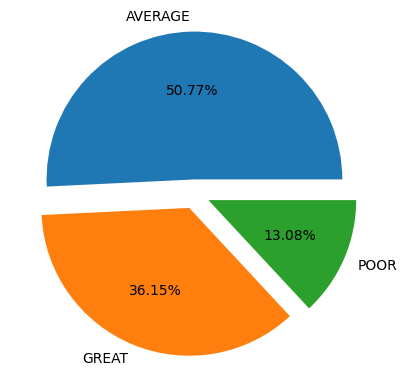

In [124]:
#let's plot and display the distribution
plt.pie(training_set1.level.value_counts(),labels=training_set1.level.value_counts().index,autopct='%1.2f%%',explode=explode)
plt.show()

In [111]:
# Try an ensemble classifier: Random Forest
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf_model = RandomForestClassifier()